# Halo !
## ini adalah notebook untuk tugas course data science Binar Academy wave 9
Perkenalkan dulu. Saya Sony, student yang ngerjain tugas ini.
Saya akan pakai pandas, matplotlib dan seaborn untuk melakukan EDA dan Visualisasi data. 

Original author dari data set ini adalah user GitHub okkyibrohim : https://github.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection 
silakan cek lama tersebut untuk mempelajari lebih lanjut


data set yang dipakai adalah kumpulan tweet dan label informasi yang terdeteksi dari masing-masing tweetnya.

setiap label berisi angka 1, yang berarti 'yes' dan 0, yang berarti 'no'.

artinya jika sebuah tweet termasuk ke dalam salah-satu jenis kategori di atas, akan mendapatkan angka 1. 

-  HS : hate speech label;
-  Abusive : abusive language label;
-  HS_Individual : hate speech targeted to an individual;
-  HS_Group : hate speech targeted to a group;
-  HS_Religion : hate speech related to religion/creed;
-  HS_Race : hate speech related to race/ethnicity;
-  HS_Physical : hate speech related to physical/disability;
-  HS_Gender : hate speech related to gender/sexual orientation;
-  HS_Gender : hate related to other invective/slander;
-  HS_Weak : weak hate speech;
-  HS_Moderate : moderate hate speech;
-  HS_Strong : strong hate speech.

kalau ada imput, masukan, atau hal lain bisa hubungi saya melalui email di bawah ini

contact : sonyderthas@gmail.com

### Import Library dan mempersiapkan dataframe

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Membaca file CSV untuk data
df = pd.read_csv('csv_data/data.csv', encoding = 'latin -1')

# Membaca file CSV data abusive
df_abusive = pd.read_csv('csv_data/abusive.csv')
df_abusive.columns =['word']

In [152]:
# Menampilkan beberapa baris pertama data
print(df.head())

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0 

In [159]:
# Menampilkan beberapa baris pertama data abusive
print(df_abusive.head())

      word
0     alay
1    ampas
2     buta
3  keparat
4   anjing


### kulik tipis-tipis dulu
saya pengen tau dulu jumlah kolom keseluruhan dan jumlah tweet yang duplikat

In [51]:
# menghitung jumlah baris
jumlah_baris : len(df. index)

In [158]:
# count duplicates row
duplicate = df.duplicated(subset='Tweet').sum()

In [53]:
print ("jumlah baris adalah :", jumlah_baris)
print ("jumlah baris yang duplikat adalah :", duplicate)

jumlah baris adalah : 13169
jumlah baris yang duplikat adalah : 146


#### ternyata ada 13.169 baris data
#### 146 tweet yang duplikat 

untuk kebutuhan EDA dan visualisasi, semua data yang duplikat kita hapus

In [64]:
#clear duplicates row
df_clean = df.drop_duplicates(subset='Tweet')

In [70]:
#menghitung jumlah row tanpa duplicates
clean_row = len(df_clean. index)

print("total row setelah cleansing duplikat :", clean_row)

total row setelah cleansing duplikat : 13023


#### sekarang saya punya 13.023 Row 
#### selanjutnya saya mau menghitung rata-rata karater dan rata-rata kata per tweet

pertama kita panggil dulu jumlah karater dan jumlah kata dari masing-masing tweet

In [71]:
# Membuat kolom 'Panjang_Karakter', 'jumlah_kata', 'jumlah_kata_sensor'
df_clean.loc[:,'Panjang_Karakter'] = df_clean['Tweet'].apply(lambda x: len(str(x)))
df_clean.loc[:,'Jumlah_kata'] = df_clean['Tweet'].apply(lambda x: len(x.split(' ')))

# panngil tweet, panjang karakter, dan jumlah kata
kolom_pilihan = ['Tweet', 'Panjang_Karakter', 'Jumlah_kata']

# Memanggil kolom sesuai pilihan
df_pilihan = df_clean[kolom_pilihan]

# Menampilkan DataFrame hasil
print(df_pilihan.head())


                                               Tweet  Panjang_Karakter  \
0  - disaat semua cowok berusaha melacak perhatia...               138   
1  RT USER: USER siapa yang telat ngasih tau elu?...               120   
2  41. Kadang aku berfikir, kenapa aku tetap perc...               254   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...                75   
4  USER USER Kaum cebong kapir udah keliatan dong...                89   

   Jumlah_kata  
0           25  
1           21  
2           37  
3           14  
4           14  


#### sudah berhasil. sekarang saya hitung rata-rata panjang karakter dan jumlah kata-nya

In [103]:
# Menghitung mean (rata-rata) panjang karakter

mean_karakter = df_clean['Panjang_Karakter'].mean()
mean_jumlah_kata = df_clean['Jumlah_kata'].mean ()


print("Rata-rata Panjang Karakter adalah ", mean_karakter,"kata")
print("Rata jumlah kata adalah ", mean_jumlah_kata , " kata" )

Rata-rata Panjang Karakter adalah  114.11034323888505 kata
Rata jumlah kata adalah  17.259540812408815  kata


#### kita dapat angka rata-rata tweet mengandung 114 karakter dan 17 kata

#### Sekarang kita lihat distribusi jumlah karakternya

kita menemukan distribusi panjang karakter memiliki kecondongan negatif (positively skewed) atau lebih banyak data di area sebelah kiri.
artinya lebih banyak tweet yang mengandung jumlah karakter yang sedikit.
tapi ada peningkatan lagi di sekitar angka 250.

kita juga bisa melihat kalau 'mode' ada di sebelah kanan histogram, terpisah jauh dengan 'mean' dan 'median'

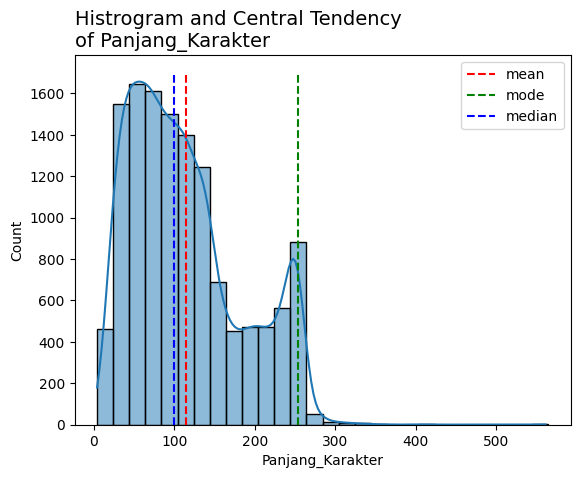

In [104]:
sns.histplot(data=df_clean, x='Panjang_Karakter', binwidth=20, kde=True)
plt.vlines(df_clean['Panjang_Karakter'].mean(), 0, 1700, label='mean', linestyles='dashed', color='red')
plt.vlines(df_clean['Panjang_Karakter'].mode(), 0, 1700, label='mode', linestyles='dashed', color='green')
plt.vlines(df_clean['Panjang_Karakter'].median(), 0, 1700, label='median', linestyles='dashed', color='blue')
plt.legend()
plt.title("Histrogram and Central Tendency\nof Panjang_Karakter", loc="left", fontsize=14)

plt.show()

#### bagaimana dengan pernyebaran jumlah kata-nya ?

ternyata jumlah kata di tweet juga terdistribusi dengan kecondongan negatif.

artinya lebih banyak orang yang nge-tweet dengan jumla kata yang sedikit.

nilai 'mean', 'mode', dan 'median' terlihat ada di tempat yang bedetkatan

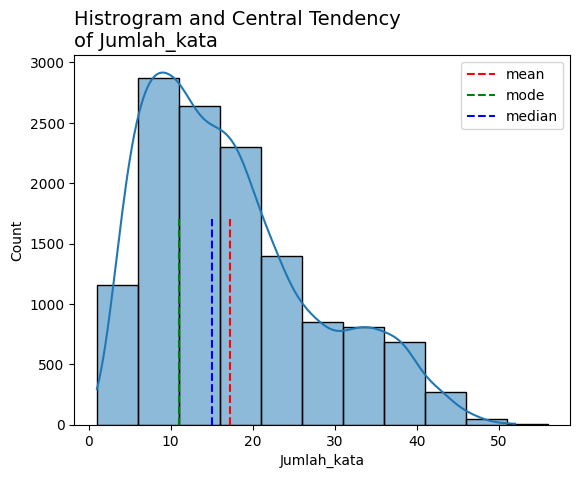

In [108]:
sns.histplot(data=df_clean, x='Jumlah_kata', binwidth=5, kde=True)
plt.vlines(df_clean['Jumlah_kata'].mean(), 0, 1700, label='mean', linestyles='dashed', color='red')
plt.vlines(df_clean['Jumlah_kata'].mode(), 0, 1700, label='mode', linestyles='dashed', color='green')
plt.vlines(df_clean['Jumlah_kata'].median(), 0, 1700, label='median', linestyles='dashed', color='blue')
plt.legend()
plt.title("Histrogram and Central Tendency\nof Jumlah_kata", loc="left", fontsize=14)

plt.show()

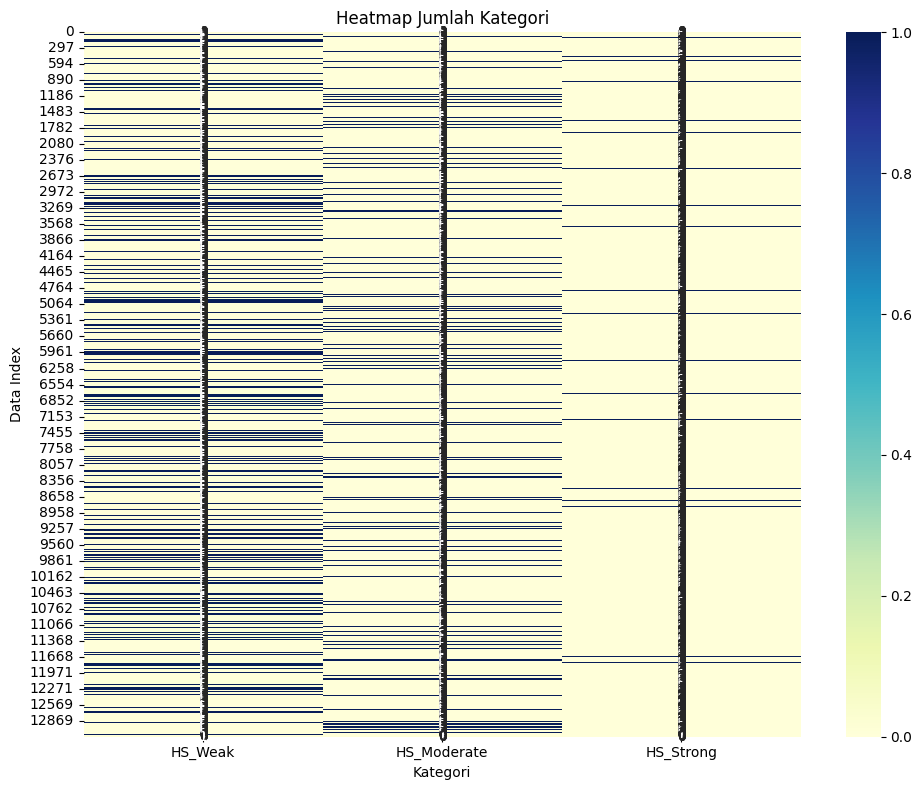

In [111]:
# Menggunakan subset DataFrame dengan kolom kategori
df_subset = df_clean[['HS_Weak', 'HS_Moderate', 'HS_Strong']]

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Ukuran gambar heatmap
sns.heatmap(df_subset, cmap='YlGnBu', annot=True, fmt='d')  # cmap: skema warna, annot: menampilkan angka di dalam sel, fmt: format angka
plt.title('Heatmap Jumlah Kategori')
plt.xlabel('Kategori')
plt.ylabel('Data Index')

plt.tight_layout()
plt.show()


#### Sekarang saya mau lihat, kategori mana yang dapat angka paling banyak

- ternyata dari 13 ribuan tweet, ada 5501 yang dapat flag hate speech
- kategori hate speech paling banyak adalah abusive, berjumlah 4992.
- ketegori hate speech paling sedikit adalah hate speech terhadap gender, berjumlah 303.

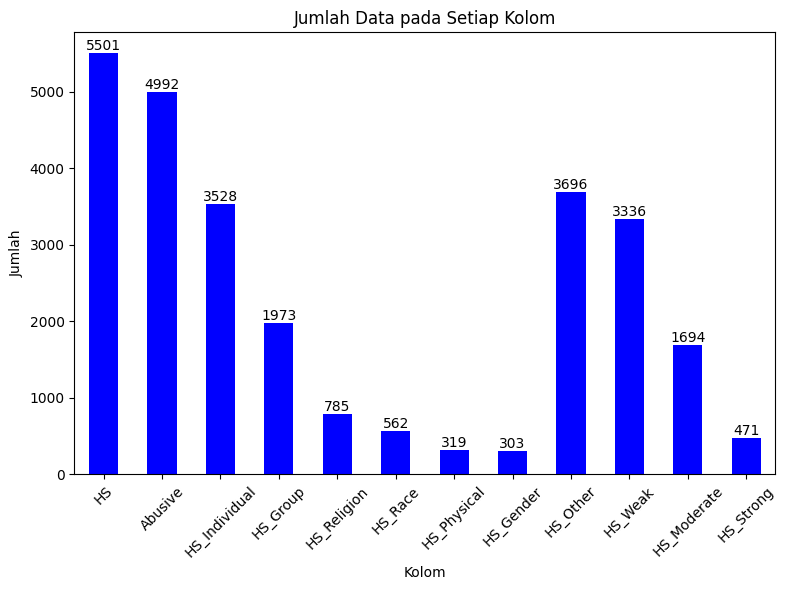

In [131]:
# Menghitung jumlah data pada setiap kolom boolean
jumlah_per_kolom = df_clean[['HS','Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].sum()


# Membuat grafik batang
plt.figure(figsize=(8, 6))  # Ukuran gambar grafik
bars = jumlah_per_kolom.plot(kind='bar', color='blue')

plt.xlabel('Kolom')
plt.ylabel('Jumlah')
plt.title('Jumlah Data pada Setiap Kolom')

plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca

# Menampilkan angka pada setiap batang
for i, val in enumerate(jumlah_per_kolom):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Ini adalah 5 tweet yand mendapat label paling banyak.
#### kasar ih..

In [136]:
# Mengurutkan DataFrame berdasarkan kolom 'Total_Label' secara menurun
top_5_tweets = df_clean.nlargest(5, 'Total_Label')

# Menampilkan tweet dan jumlah labelnya
for index, row in top_5_tweets.iterrows():
    tweet = row['Tweet']
    jumlah_label = row['Total_Label']
    print("Tweet:", tweet)
    print("Jumlah Label:", jumlah_label)
    print()


Tweet: USER KRISTUS ANJING ASU JIAMPUT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK KOTANG SIWUK IDIOT KEPARAT PICEK TELEK PEJUH SIWUK K
Jumlah Label: 7

Tweet: Kita habis-habisan aja, bang. Usir kafir & cina dari nusantara. merekalah racun akidah, tukang sogok, kristenisasi, pelacur, miras. Kafir anjing!
Jumlah Label: 7

Tweet: USER Hauahahaha muke banci kecoa kafir z\xf0\x9f\x98\x82\xf0\x9f\xa4\xa3'
Jumlah Label: 7

Tweet: USER HUAHAHAHA KAFIR PLONGA PLONGO NIH.. MUKE BANCI SALON \xf0\x9f\x98\x82\xf0\x9f\xa4\xa3\xf0\x9f\x98\x85\xf0\x9f\x98\x86 URL
Jumlah Label: 7

Tweet: USER heh kontol, jan sok pemes lu di rp, muka kek memek, org tua lu kek monyet, agama lu aje agama kontol 35'
Jumlah Label: 7



#### kata-kata abusive mana yang paling banyak muncul

saya akan pakau DataFrame df_abusive untuk cari tahu frekuensi kemunculan masing-masing kata dari DataFrame tersebut

In [169]:
# Membuat kolom baru di 'df_clean' untuk setiap kata dalam tabel 'abusive'
for word in df_abusive['word']:
    df_clean.loc[:,word] = df_clean['Tweet'].str.contains(word, case=False)

# Menghitung jumlah kemunculan kata-kata dalam 'df_clean'
jumlah_kemunculan = df_clean[df_abusive['word']].sum()

# Menampilkan hasil
print(jumlah_kemunculan)


alay            61
ampas           35
buta           143
keparat         41
anjing         142
              ... 
rezim          332
sange           31
serbet           5
sipit          163
transgender     26
Length: 125, dtype: int64


In [170]:
# Mengambil 10 kata teratas berdasarkan jumlah kemunculannya
top_10_kata = jumlah_kemunculan.nlargest(10)

bong       563
tai        528
cebong     480
asing      427
komunis    339
rezim      332
kafir      268
onta       257
antek      232
hina       232
dtype: int64


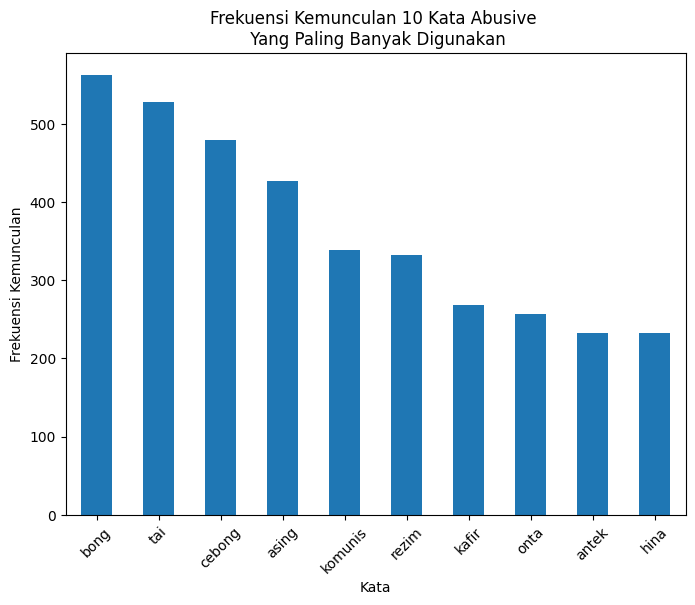

In [176]:
# Membuat grafik batang
plt.figure(figsize=(8, 6))  # Ukuran gambar grafik
top_10_kata.plot(kind='bar')

plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Frekuensi Kemunculan 10 Kata Abusive \n Yang Paling Banyak Digunakan')
plt.xticks(rotation=45)

plt.show()